# Solvers for Vehicle Routing Problem with Time Windows
The `cost` acts as a parameter of comparison between different solvers. Here it is the total time taken by each vehicle to go from one node to another.
The approximation ratio is the ratio of the cost of the obtained from the solver to that of the best known solution. The closer it is to 1, the better the solver is.

By default the `LeapHybridCQMSampler` lets the solver run for around **5 seconds**. For better results this can be increased by passing a parameter `time_limit` into the solver's `.solve()` method. However, one needs to be careful about it as running it for too long may exhaust the limit of resources that D-Wave provides.

In [1]:
import json
f = open('datasets/routing.json', 'r')
data = json.load(f)['vrptw'][2]

In [2]:
n, m = data['num_clients'], data['num_vehicles']
cost = data['cost_matrix']
tw = data['time_windows']
xc, yc = None, None


FULL QUBO SOLVER FOR TIME WINDOWS - EXACT (CLASSICAL) SOLVER


Minimum cost: 31.0
Time taken to solve: 380.000 ms


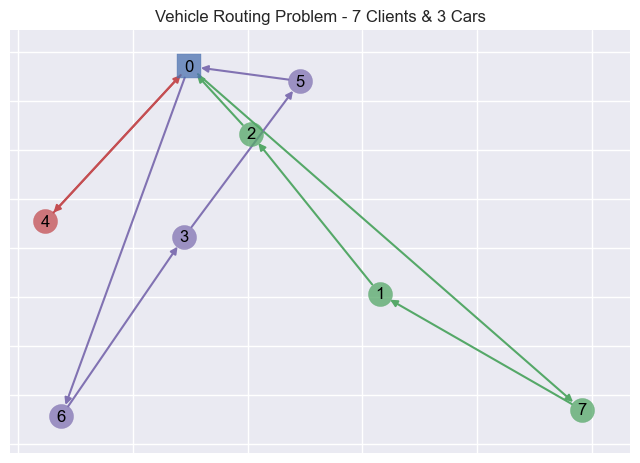

In [3]:
from VRP.classical.fqstw import FQSTW

solver = FQSTW(n, m, cost, xc=xc, yc=yc, tw=tw)
sol = solver.formulate_and_solve()
solver.visualize()


FULL QUBO SOLVER (Constrained Quadratic Model)
22 feasible solutions of 41.
Minimum total cost: 31.0
Number of variables: 92
Runtime: 5002.633 ms


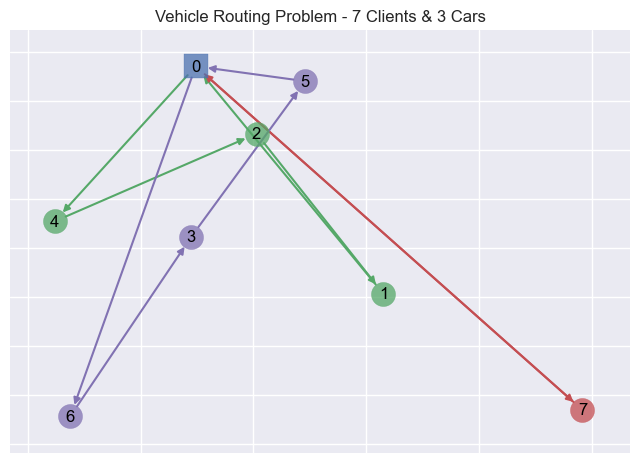

In [4]:
from VRP.quantum.CQM_based.fqstw import FQSTW

solver = FQSTW(n, m, cost, xc=xc, yc=yc, tw=tw)
sol = solver.solve(time_limit=5)
solver.visualize()